<a href="https://colab.research.google.com/github/jford59/ML1/blob/main/ML1/HW4/ML4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 0, 'PCAs')

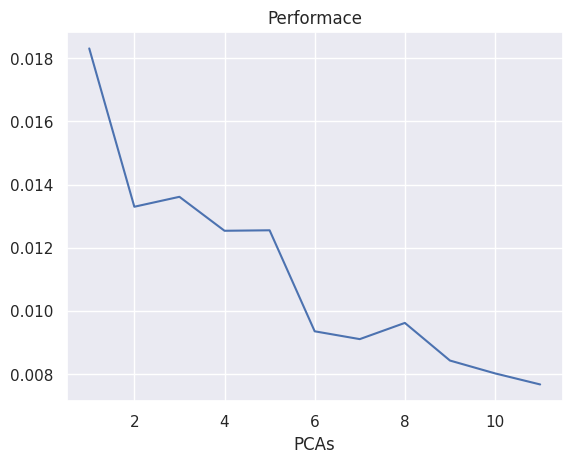

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

housing.isnull().sum()*100/housing.shape[0]

varlist = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

def binary_map(x):
  return x.map({'yes' : 1, 'no' : 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.pop('furnishingstatus')

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

scaler = MinMaxScaler()
housing[num_vars] = scaler.fit_transform(housing[num_vars])
housing.head()

y = housing.pop('price')
X = housing.values

np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(X,  y, train_size = 0.8)

k_val = range(1,12)

loss = []

for K in k_val:
  pca = PCA(n_components = K)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)
  model = SVR(kernel = 'linear', C = 1)
  model.fit(x_train_pca, y_train)
  pred = model.predict(x_test_pca)
  loss.append(metrics.mean_squared_error(y_test, pred, squared=True))

plt.plot(k_val, loss)
plt.title("Performace")
plt.xlabel("PCAs")